In [1]:
import os
import fastai
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image
import gc

In [2]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=43)

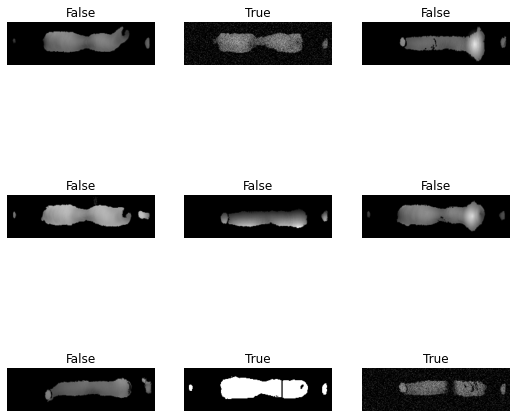

In [3]:
dls.show_batch()

In [4]:
precision = Precision()
f1 = F1Score()

In [5]:
learn = Learner(dls, densenet121(pretrained = True), opt_func = SGD,
              metrics=[accuracy,precision,f1])

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=2.7542285919189453)

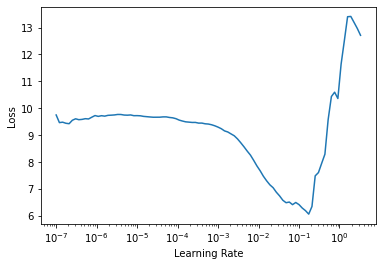

In [7]:
learn.lr_find()

In [8]:
learn.fit(3,lr=1e-2)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.156233,0.100949,0.965000,0.985097,0.964260,01:20
1,0.038815,0.040692,0.987143,0.991354,0.987088,01:20
2,0.026688,0.024610,0.992143,0.988652,0.992171,01:20


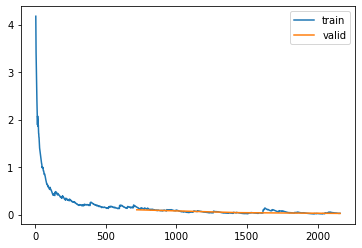

In [9]:
learn.recorder.plot_loss()

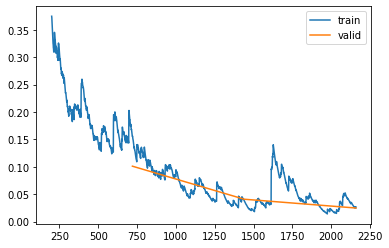

In [10]:
learn.recorder.plot_loss(skip_start=200)

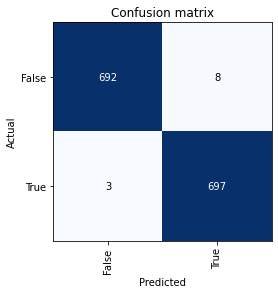

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()